# Speech Emotion Detection

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#Defining Dataset and paths
Ravdess = "./ravdess/audio_speech_actors_01-24/"
Crema = "./cremad/"
Tess = "./tess/TESS Toronto emotional speech set data/"
Savee = "./savee/"

Test="./test/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,angry,./ravdess/audio_speech_actors_01-24/Actor_16/0...
1,fear,./ravdess/audio_speech_actors_01-24/Actor_16/0...
2,fear,./ravdess/audio_speech_actors_01-24/Actor_16/0...
3,angry,./ravdess/audio_speech_actors_01-24/Actor_16/0...
4,disgust,./ravdess/audio_speech_actors_01-24/Actor_16/0...


In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,./tess/TESS Toronto emotional speech set data/...
1,disgust,./tess/TESS Toronto emotional speech set data/...
2,disgust,./tess/TESS Toronto emotional speech set data/...
3,disgust,./tess/TESS Toronto emotional speech set data/...
4,disgust,./tess/TESS Toronto emotional speech set data/...


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,./cremad/1022_ITS_ANG_XX.wav
1,angry,./cremad/1037_ITS_ANG_XX.wav
2,neutral,./cremad/1060_ITS_NEU_XX.wav
3,neutral,./cremad/1075_ITS_NEU_XX.wav
4,disgust,./cremad/1073_IOM_DIS_XX.wav


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()        

,Emotions,Path
0,sad,./savee/JK_sa01.wav
1,sad,./savee/JK_sa15.wav
2,neutral,./savee/DC_n13.wav
3,surprise,./savee/DC_su09.wav
4,neutral,./savee/DC_n07.wav


In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,./ravdess/audio_speech_actors_01-24/Actor_16/0...
1,fear,./ravdess/audio_speech_actors_01-24/Actor_16/0...
2,fear,./ravdess/audio_speech_actors_01-24/Actor_16/0...
3,angry,./ravdess/audio_speech_actors_01-24/Actor_16/0...
4,disgust,./ravdess/audio_speech_actors_01-24/Actor_16/0...


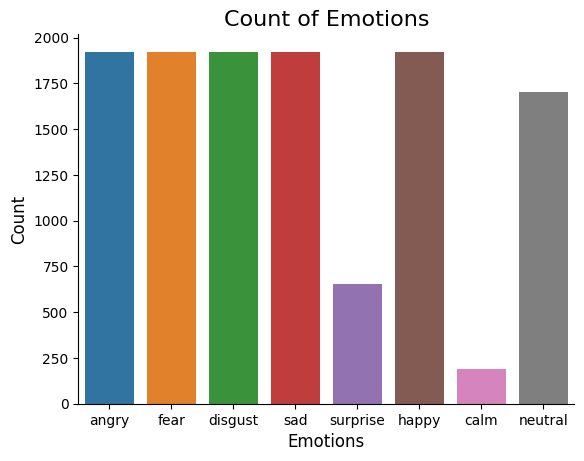

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

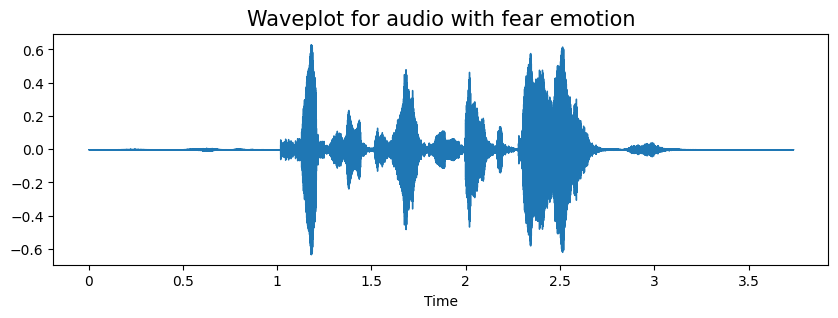

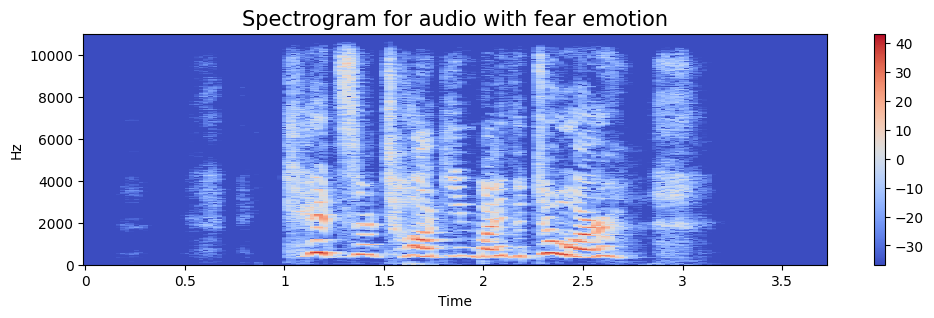

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

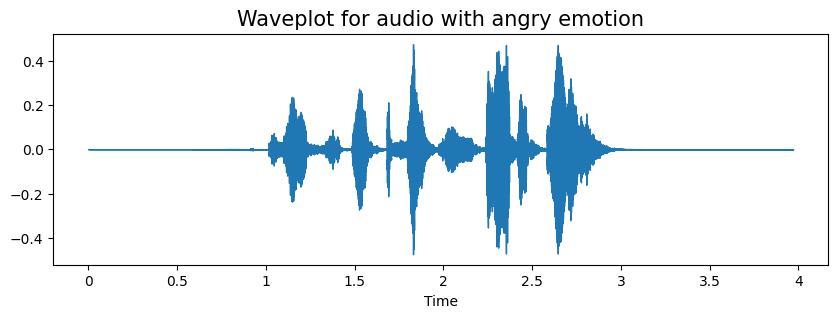

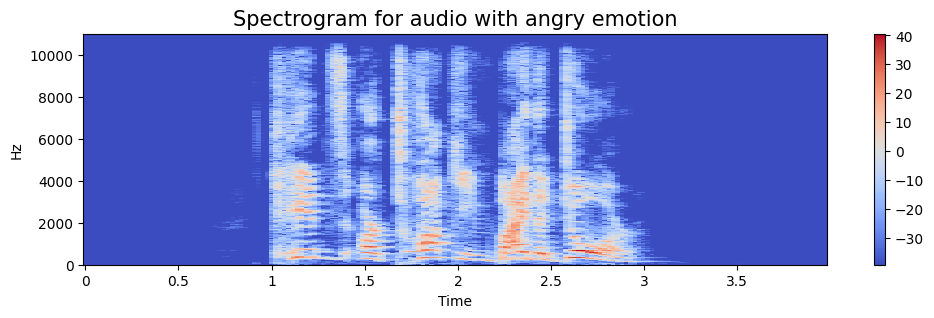

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

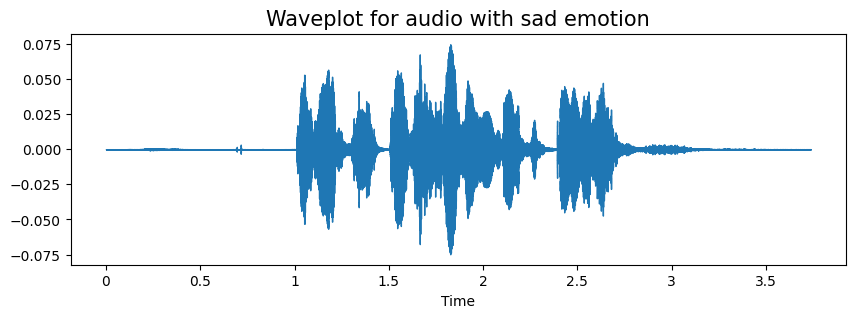

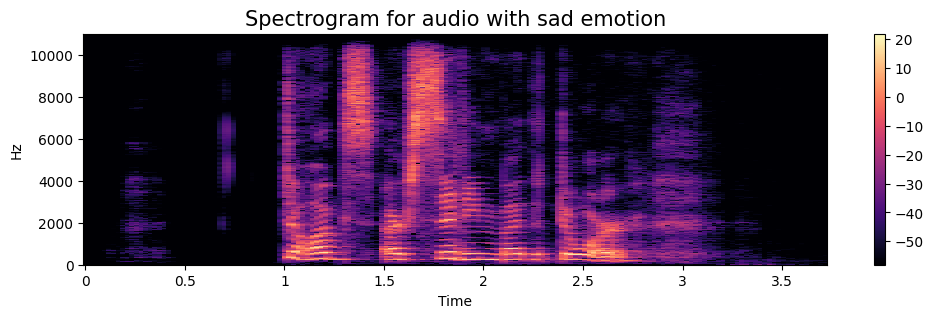

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation
## Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.

In [13]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

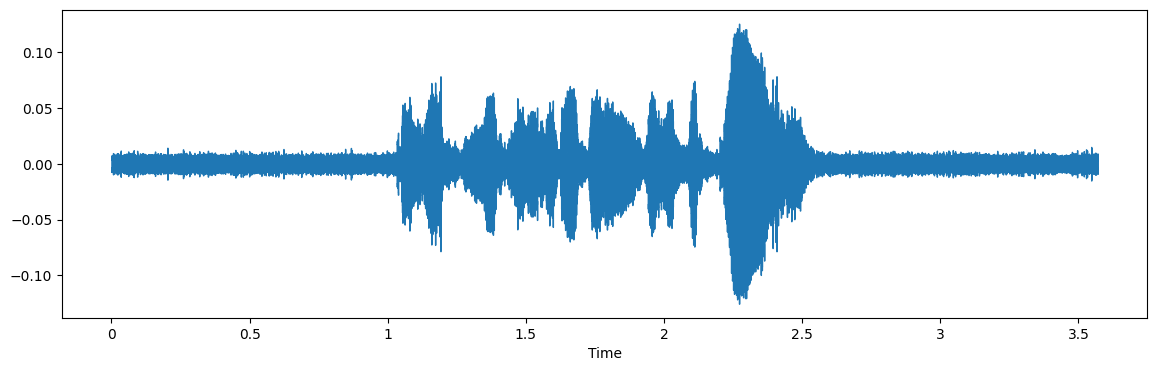

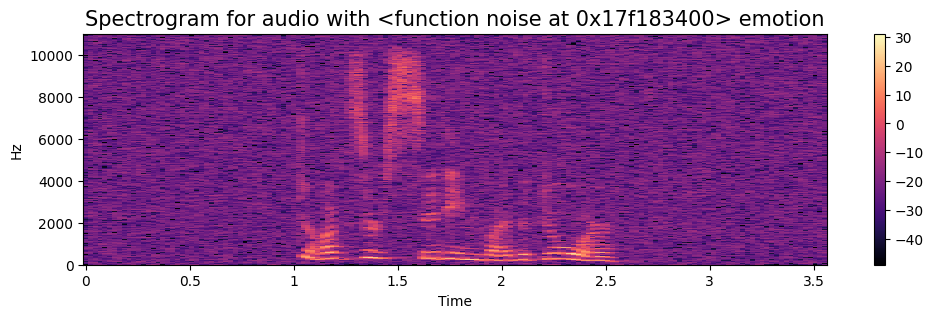

In [14]:
x = noise(data)
typ='added noise along with'
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
create_spectrogram(x,sample_rate, noise)

Audio(x, rate=sample_rate)


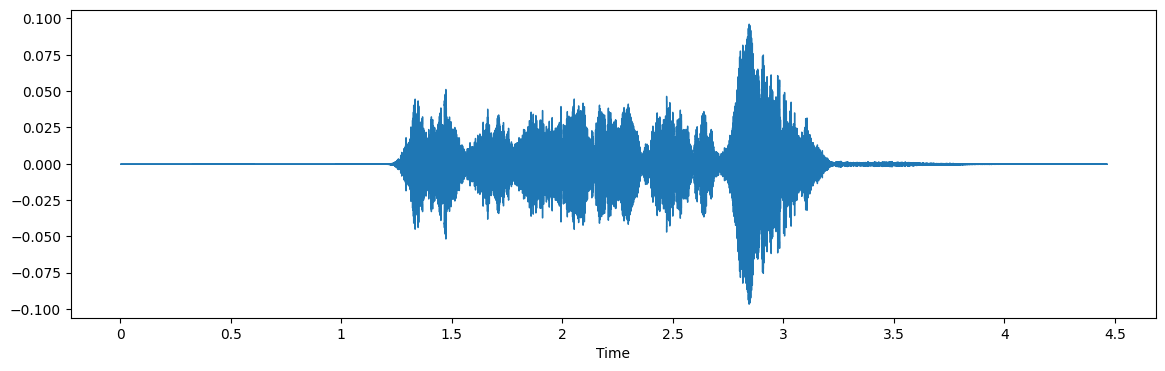

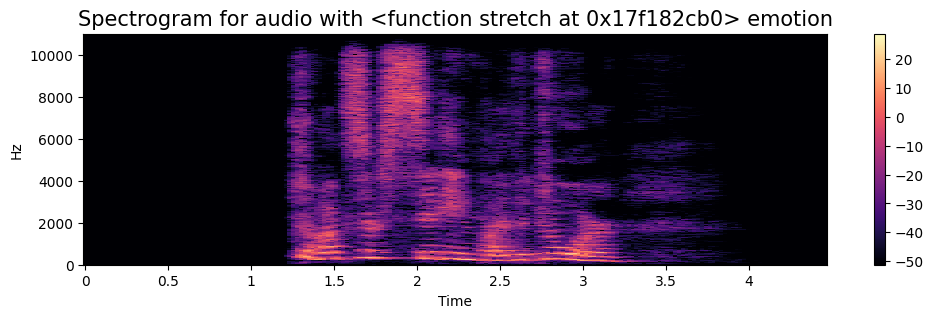

In [15]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
create_spectrogram(x, sample_rate, stretch)
Audio(x, rate=sample_rate)

## Feature Extraction
### Extraction of features is a very important part in analyzing and finding relations between different things. 
### As we already know that the data provided of audio cannot be understood by the models directly so we need to  convert them into an understandable format for which feature extraction is used.

In [16]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [17]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [18]:
X, Y = [], []
for path, emotion in zip(data_path.Path[:10000], data_path.Emotions[:10000]):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)


In [19]:
len(X), len(Y), data_path.Path.shape


(30000, 30000, (12162,))

In [20]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.192464,0.516620,0.464575,0.484971,0.538362,0.500001,0.598386,0.544128,0.527744,0.602508,...,0.006685,0.004040,0.004858,0.004599,0.005219,0.003749,0.000923,0.000175,1.708295e-06,angry
1,0.296269,0.610558,0.619844,0.655959,0.620734,0.658176,0.598395,0.594148,0.668202,0.723676,...,0.006985,0.004435,0.005297,0.004963,0.005615,0.004178,0.001259,0.000494,3.528036e-04,angry
2,0.222465,0.623192,0.508885,0.473313,0.479617,0.492326,0.520755,0.625966,0.541471,0.545651,...,0.003624,0.002221,0.000976,0.000675,0.000999,0.000515,0.000244,0.000016,5.332614e-08,angry
3,0.184814,0.552939,0.514264,0.477355,0.408057,0.359502,0.394911,0.405739,0.433439,0.497811,...,0.002602,0.002953,0.003854,0.003141,0.002715,0.001565,0.000508,0.000056,7.527195e-07,fear
4,0.309498,0.731587,0.734407,0.719879,0.680601,0.652561,0.598068,0.561759,0.582418,0.610506,...,0.002848,0.003258,0.004192,0.003415,0.003090,0.001905,0.000837,0.000362,2.990921e-04,fear


In [21]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [22]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [23]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22500, 162), (22500, 8), (7500, 162), (7500, 8))

In [24]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22500, 162), (22500, 8), (7500, 162), (7500, 8))

In [25]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22500, 162, 1), (22500, 8), (7500, 162, 1), (7500, 8))

In [26]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [27]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


2023-04-16 21:10:16.663440: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


352/352 [==============================] - 29s 80ms/step - loss: 1.7349 - accuracy: 0.2985 - val_loss: 1.5257 - val_accuracy: 0.3737 - lr: 0.0010
Epoch 2/50
352/352 [==============================] - 28s 80ms/step - loss: 1.5468 - accuracy: 0.3666 - val_loss: 1.4869 - val_accuracy: 0.4163 - lr: 0.0010
Epoch 3/50
352/352 [==============================] - 29s 82ms/step - loss: 1.4805 - accuracy: 0.3932 - val_loss: 1.4148 - val_accuracy: 0.4272 - lr: 0.0010
Epoch 4/50
352/352 [==============================] - 29s 81ms/step - loss: 1.4284 - accuracy: 0.4200 - val_loss: 1.3682 - val_accuracy: 0.4493 - lr: 0.0010
Epoch 5/50
352/352 [==============================] - 29s 82ms/step - loss: 1.3954 - accuracy: 0.4321 - val_loss: 1.3257 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 6/50
352/352 [==============================] - 29s 82ms/step - loss: 1.3635 - accuracy: 0.4491 - val_loss: 1.3222 - val_accuracy: 0.4831 - lr: 0.0010
Epoch 7/50
352/352 [==============================] - 29s 82ms/step -

235/235 [==============================] - 3s 12ms/step - loss: 1.3404 - accuracy: 0.5428
Accuracy of our model on test data :  54.28000092506409 %


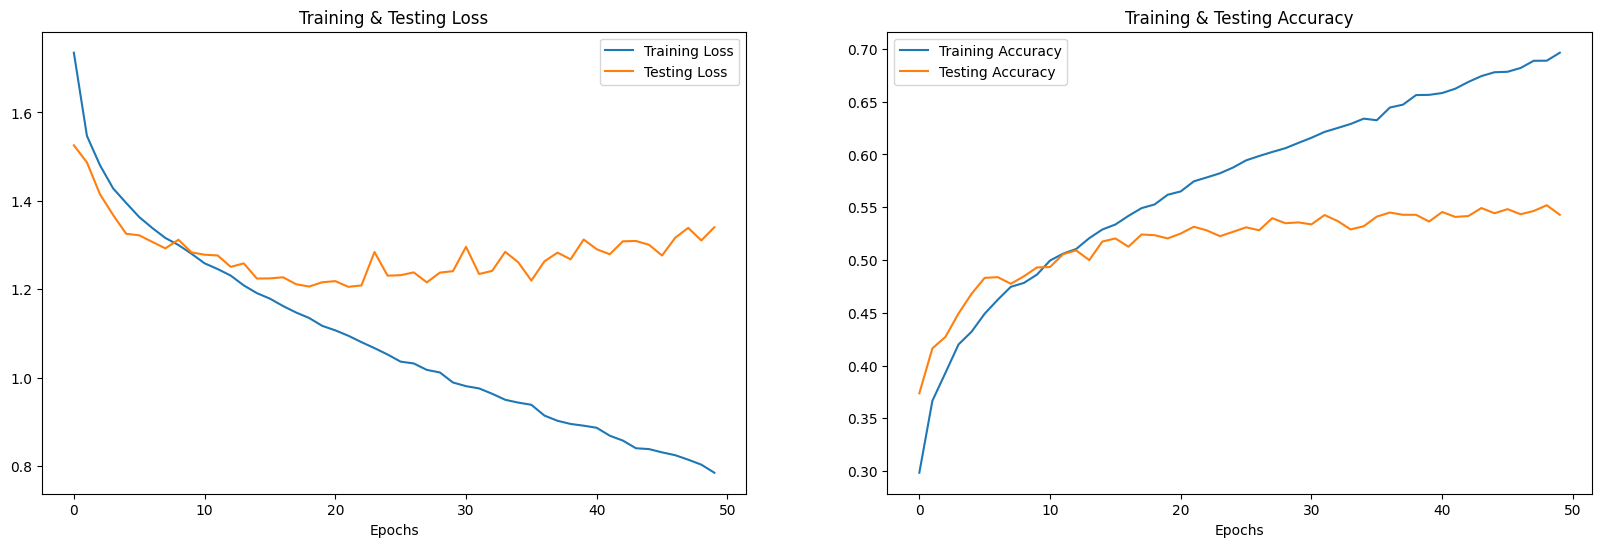

In [28]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [29]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

235/235 [==============================] - 3s 11ms/step


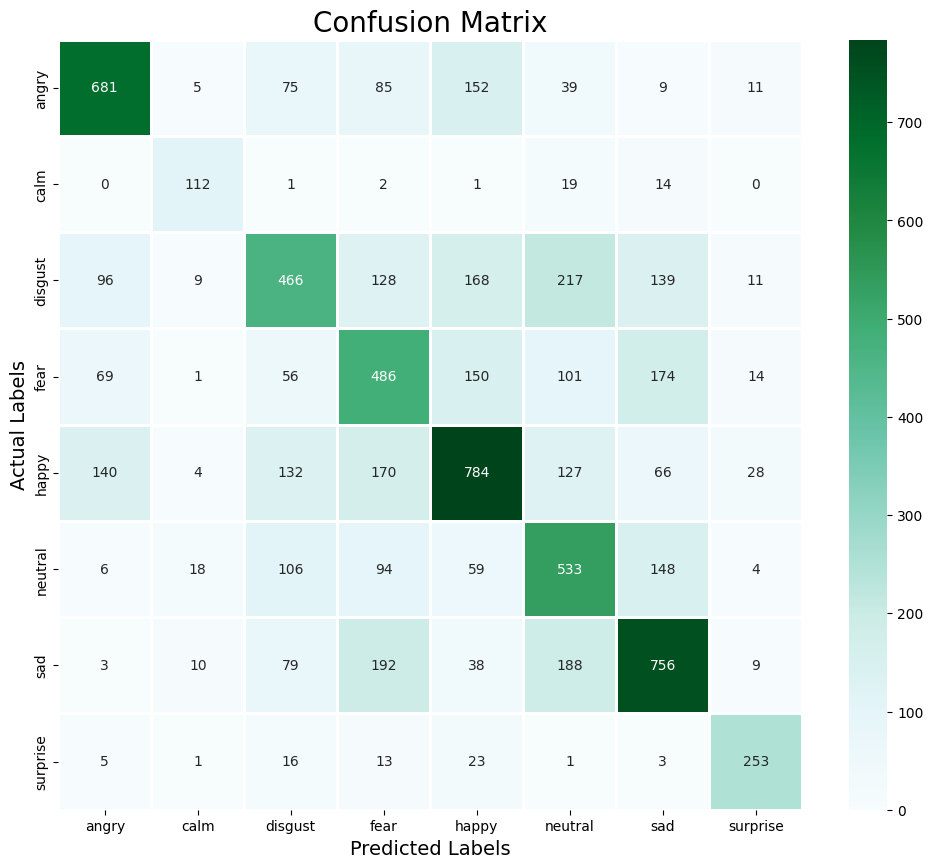

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='BuGn', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.68      0.64      0.66      1057
        calm       0.70      0.75      0.72       149
     disgust       0.50      0.38      0.43      1234
        fear       0.42      0.46      0.44      1051
       happy       0.57      0.54      0.55      1451
     neutral       0.44      0.55      0.49       968
         sad       0.58      0.59      0.59      1275
    surprise       0.77      0.80      0.78       315

    accuracy                           0.54      7500
   macro avg       0.58      0.59      0.58      7500
weighted avg       0.55      0.54      0.54      7500



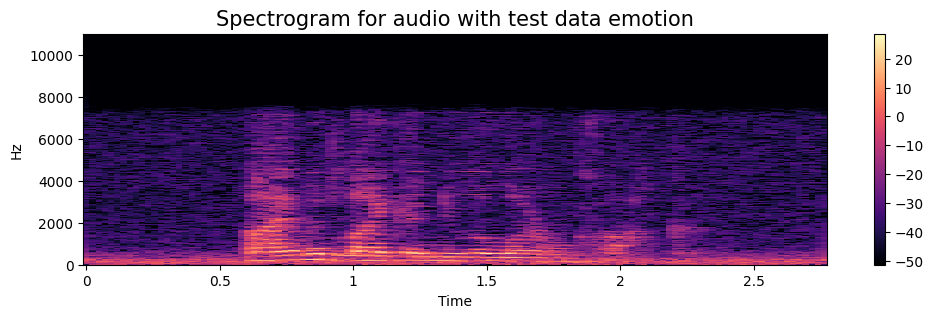

In [32]:
file_name="test.wav"
file_path=Test+file_name
data,sr=librosa.load(file_path)
create_spectrogram(data,sr,"test data")
Audio(file_path)

In [33]:
feature=get_features(file_path)[0]
feature=np.array([feature])
feature=np.expand_dims(feature,axis=2)
feature.shape


(1, 162, 1)

In [34]:
result=model.predict(feature).astype(int)
result,encoder.categories_

1/1 [==============================] - 0s 16ms/step


(array([[0, 0, 0, 0, 0, 1, 0, 0]]),
 [array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
         'surprise'], dtype=object)])

In [35]:
temp=result[0] 
temp

array([0, 0, 0, 0, 0, 1, 0, 0])

In [36]:
for i in range(len(temp)):   
    if temp[i] == 1:
        print(encoder.categories_[0][i])

neutral


###### 